In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'relu(x), tanh(x)')

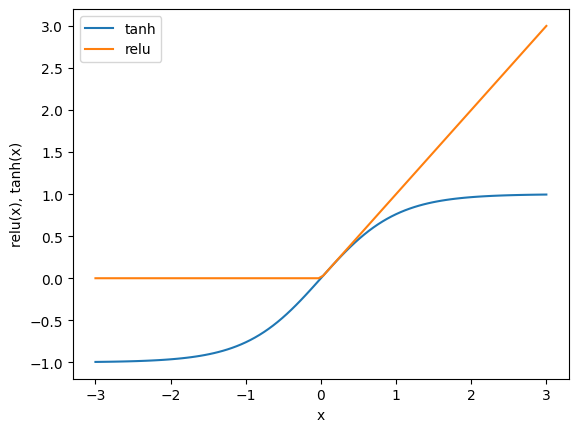

In [2]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0, 0.5, 'Feature 1')

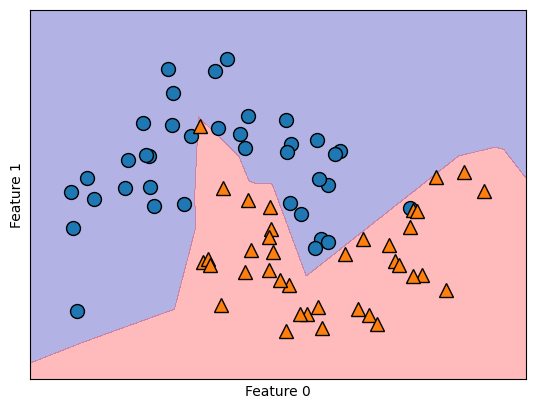

In [3]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X, y = make_moons(100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='relu',hidden_layer_sizes=(10,10)).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [4]:
display(mlp.score(X_test, y_test))
display(mlp.score(X_train, y_train))

0.84

0.9866666666666667

c:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

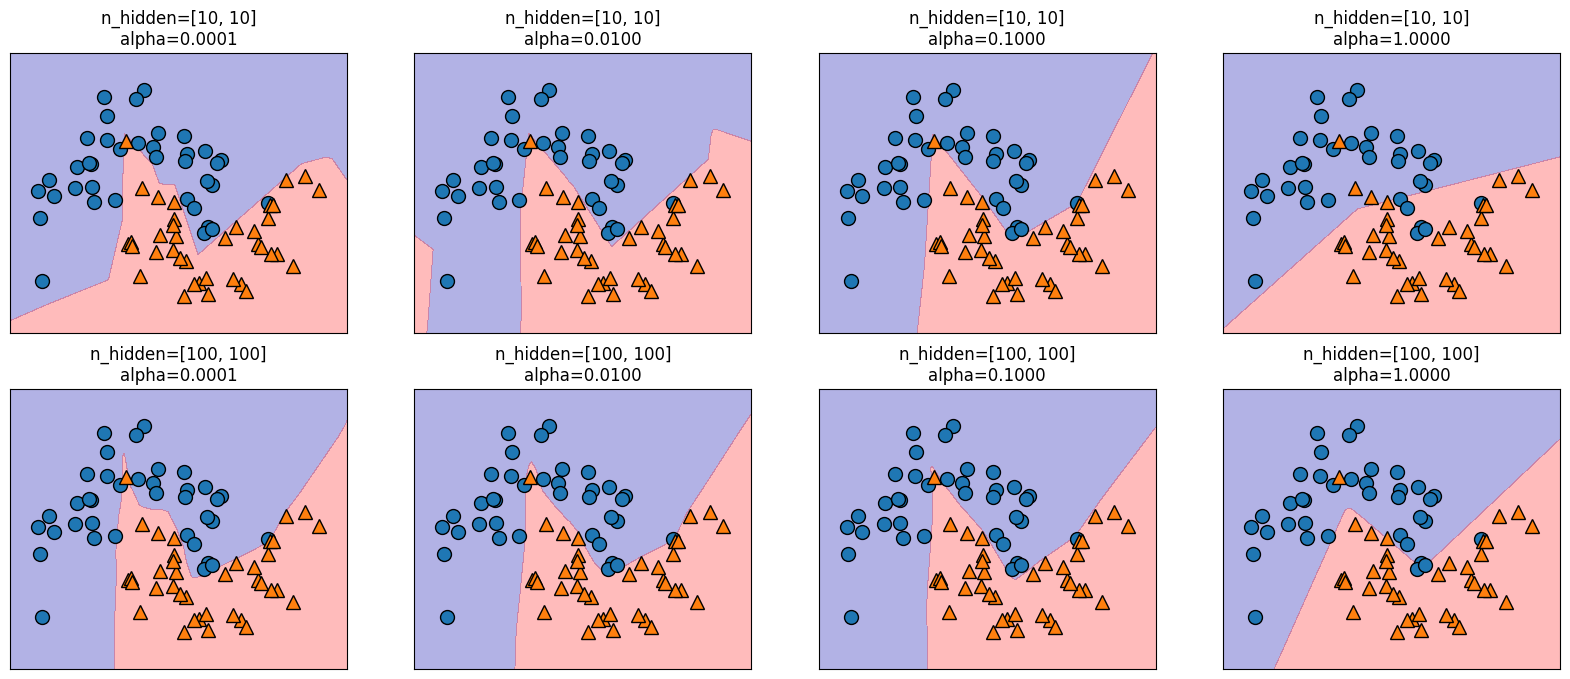

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
   for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
      mlp = MLPClassifier(solver='lbfgs', random_state=0,
      hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
      alpha=alpha)
      mlp.fit(X_train, y_train)
      mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
      mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
      ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
      n_hidden_nodes, n_hidden_nodes, alpha))


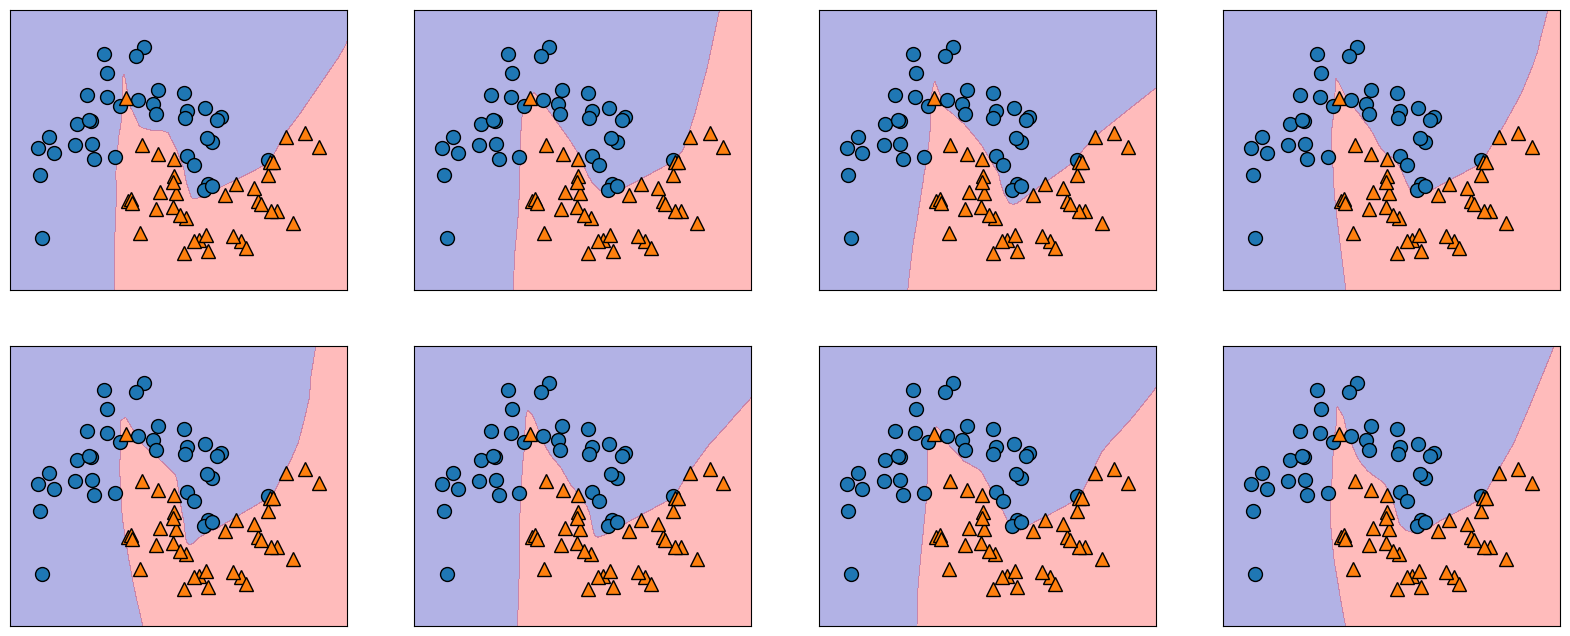

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver="lbfgs", random_state=i,
    hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)


Scaling Data

In [ ]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)